In [25]:
import sys, os

import pandas as pd
import numpy as np

from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split, StratifiedKFold

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support


import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sn

In [26]:
try:
    data = pd.read_csv('../dataset/new_clean_bo3.csv', encoding='utf-8-sig', converters={'p_start':eval,'p_temp':eval,'p_end':eval}, index_col=0)
except:
    sys.path.append(os.path.realpath('../'))
    data = pd.read_csv('../dataset/new_clean_bo3.csv', encoding='utf-8-sig', converters={'p_start':eval,'p_temp':eval,'p_end':eval}, index_col=0)

data = data.drop(columns=['pre_routes','freq', 'regions'])
data.reset_index(level=0, inplace=True)
print(type(data['p_start'][0]))

data.head(10)

<class 'tuple'>


,level_0,index,vehicle_id,p_start,p_temp,p_end,label
0,0,0,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.738, 10.8012)",False
1,1,16,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.73100000000001, 10.7996)",False
2,2,21,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.721, 10.7981)",False
3,3,40,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.695, 10.7912)",False
4,4,50,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.68799999999999, 10.7858)",False
5,5,59,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.681, 10.7926)",False
6,6,102,100000025,"(106.74, 10.8014)","(106.738, 10.8012)","(106.736, 10.8026)",False
7,7,106,100000025,"(106.74, 10.8014)","(106.738, 10.8012)","(106.734, 10.8034)",False
8,8,107,100000025,"(106.74, 10.8014)","(106.738, 10.8012)","(106.73200000000001, 10.8028)",False
9,9,112,100000025,"(106.74, 10.8014)","(106.738, 10.8012)","(106.73200000000001, 10.8)",False


In [27]:
data['label'] = data['label'].apply(lambda label: -1 if label == False else 1)

print("N_normal: ",len(data[data['label']==-1]))
print("N_abnormal: ",len(data[data['label']==1]))
data['label'].describe()

N_normal:  9401
N_abnormal:  5460


count    14861.000000
mean        -0.265191
std          0.964228
min         -1.000000
25%         -1.000000
50%         -1.000000
75%          1.000000
max          1.000000
Name: label, dtype: float64

In [28]:
data['feature'] = data['p_start'] + data['p_temp'] + data['p_end']
data

,level_0,index,vehicle_id,p_start,p_temp,p_end,label,feature
0,0,0,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.738, 10.8012)",-1,"(106.74, 10.8014, 106.73899999999999, 10.8012,..."
1,1,16,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.73100000000001, 10.7996)",-1,"(106.74, 10.8014, 106.73899999999999, 10.8012,..."
2,2,21,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.721, 10.7981)",-1,"(106.74, 10.8014, 106.73899999999999, 10.8012,..."
3,3,40,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.695, 10.7912)",-1,"(106.74, 10.8014, 106.73899999999999, 10.8012,..."
4,4,50,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.68799999999999, 10.7858)",-1,"(106.74, 10.8014, 106.73899999999999, 10.8012,..."
...,...,...,...,...,...,...,...,...
14856,14856,7272177,100000533,"(106.682, 10.822000000000001)","(106.679, 10.8284)","(106.677, 10.8429)",1,"(106.682, 10.822000000000001, 106.679, 10.8284..."
14857,14857,7272544,100000533,"(106.682, 10.8224)","(106.68, 10.8272)","(106.679, 10.8515)",1,"(106.682, 10.8224, 106.68, 10.8272, 106.679, 1..."
14858,14858,7272961,100000533,"(106.682, 10.8237)","(106.679, 10.8284)","(106.677, 10.8429)",1,"(106.682, 10.8237, 106.679, 10.8284, 106.677, ..."
14859,14859,7274155,100000533,"(106.68, 10.8272)","(106.677, 10.8429)","(106.677, 10.8432)",1,"(106.68, 10.8272, 106.677, 10.8429, 106.677, 1..."


In [29]:
from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling, entropy_sampling

X = np.array(data['feature'].tolist())
y = np.array(data['label'].tolist())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
vectorizer.fit(X_train)

X_train.shape, X_test.shape, len(vectorizer.get_feature_names())

d:\pythonapp\v2\.envgps-v2\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


((11145, 6), (3716, 6), 876)

In [30]:
initial_idx = np.random.choice(range(len(X_train)), size=int(X_train.shape[0]*0.6), replace=False)

X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]
X_pool, y_pool = np.delete(X_train, initial_idx, axis=0), np.delete(y_train, initial_idx, axis=0)



precision_test = []
recall_test = []
f1_test = []
acc_test = []

X_initial_mat = vectorizer.transform(X_initial)
X_pool_mat = vectorizer.transform(X_pool)
X_test_mat = vectorizer.transform(X_test)


n_initial = 100
n_queries = 50
clf = SVC(C=5.0, kernel='rbf', tol=1e-5, max_iter=-1, random_state=42, probability=True)


learner = ActiveLearner(
    estimator=clf,
    query_strategy=entropy_sampling,
    X_training=X_initial_mat, y_training=y_initial
)

print(X_initial.shape, X_pool.shape, X_test.shape)

(6687, 6) (4458, 6) (3716, 6)


In [34]:
4458/50

89.16

In [35]:
for i in range(n_queries):
#     print(X_pool_mat.shape)
    try:
        query_idx, query_instance = learner.query(X_pool_mat, n_instances=int(X_pool_mat.shape[0]/n_queries)+1)
    except:
        break

    y_new = y_pool[query_idx]
    learner.teach(X_pool_mat[query_idx], y_new)
    
    X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx, axis=0)
    X_pool_mat = vectorizer.transform(X_pool)
    
    y_pred = learner.predict(X_test_mat)

    precision,recall,fscore,support = precision_recall_fscore_support(y_test,y_pred,average='macro')
    precision_test.append(precision)
    recall_test.append(recall)
    f1_test.append(fscore)
    acc_test.append(accuracy_score(y_test,y_pred))
    
    print('F1-score after query {n}: {acc:0.4f}'.format(n=i + 1, acc=f1_test[i]))


    
mean_precision_test = np.mean(precision_test)
mean_recall_test = np.mean(recall_test)
mean_f1_test = np.mean(f1_test)
mean_acc_test = np.mean(acc_test)

test_perfm = [mean_precision_test, mean_recall_test, mean_f1_test, mean_acc_test]

performance = pd.DataFrame([test_perfm], columns = ['precision', 'recall', 'f1-score', 'accuracy'], index=['test'])
performance

F1-score after query 1: 0.9649
F1-score after query 2: 0.9685
F1-score after query 3: 0.9726
F1-score after query 4: 0.9723
F1-score after query 5: 0.9741
F1-score after query 6: 0.9738
F1-score after query 7: 0.9747
F1-score after query 8: 0.9759
F1-score after query 9: 0.9753
F1-score after query 10: 0.9747
F1-score after query 11: 0.9747
F1-score after query 12: 0.9750
F1-score after query 13: 0.9738
F1-score after query 14: 0.9747
F1-score after query 15: 0.9741
F1-score after query 16: 0.9738
F1-score after query 17: 0.9738
F1-score after query 18: 0.9738
F1-score after query 19: 0.9738
F1-score after query 20: 0.9738
F1-score after query 21: 0.9741
F1-score after query 22: 0.9741
F1-score after query 23: 0.9741
F1-score after query 24: 0.9741
F1-score after query 25: 0.9741
F1-score after query 26: 0.9741
F1-score after query 27: 0.9741
F1-score after query 28: 0.9741
F1-score after query 29: 0.9741
F1-score after query 30: 0.9741
F1-score after query 31: 0.9741
F1-score after qu

,precision,recall,f1-score,accuracy
test,0.975466,0.972299,0.973847,0.976071


In [36]:
test_perfm = [precision_test[-1], recall_test[-1], f1_test[-1], acc_test[-1]]
test_perfm_al = pd.DataFrame([test_perfm], columns = ['precision', 'recall', 'f1-score', 'accuracy'], index=['test_al'])
test_perfm_al

,precision,recall,f1-score,accuracy
test_al,0.975829,0.97307,0.974423,0.976588


In [37]:
X_train_mat = vectorizer.transform(X_train)
X_test_mat = vectorizer.transform(X_test)

clf = SVC(C=5.0, kernel='rbf', tol=1e-5, max_iter=-1, random_state=42, probability=True)
clf.fit(X_train_mat, y_train)

y_pred_ml = clf.predict(X_test_mat)
ml_precision, ml_recall, ml_fscore, ml_support = precision_recall_fscore_support(y_test,y_pred_ml,average='macro')

ml_acc = accuracy_score(y_test,y_pred_ml)
test_perfm_ml = pd.DataFrame([[ml_precision,ml_recall,ml_fscore, ml_acc]], columns = ['precision', 'recall', 'f1-score', 'accuracy'], index=['test_ml'])
test_perfm_ml

,precision,recall,f1-score,accuracy
test_ml,0.977173,0.974075,0.975591,0.977664


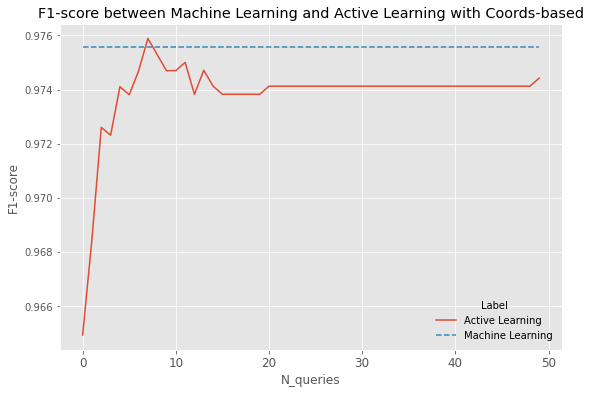

In [38]:
plt.rcParams['figure.figsize'] = (9.0, 6.0)
plt.rcParams['xtick.labelsize'] = 12
plt.plot(range(len(f1_test)),f1_test, label='Active Learning')
plt.plot(range(len(f1_test)),[ml_fscore]*n_queries, '--',label='Machine Learning')
plt.xlabel('N_queries')
plt.ylabel('F1-score')
plt.legend(loc="lower right", title="Label", frameon=False)
plt.title("F1-score between Machine Learning and Active Learning with Coords-based")
plt.show()